In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving us_flight.csv to us_flight.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['us_flight.csv']))
data = data.fillna(np.nan)
data.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
127607,2015-01-13 00:00:00,OO,6342.0,SAN,LAX,-20.0,0.0,109.0,NaN,NaN,NaN,NaN,NaN,45.0
71855,2015-01-05 00:00:00,WN,4287.0,MKE,FLL,0.0,0.0,1243.0,NaN,NaN,NaN,NaN,NaN,182.0
144594,2015-01-04 00:00:00,UA,1438.0,IAH,LAX,2.0,0.0,1379.0,NaN,NaN,NaN,NaN,NaN,234.0
44508,2015-01-08 00:00:00,DL,2177.0,ATL,SEA,15.0,0.0,2182.0,0.0,0.0,0.0,15.0,0.0,349.0
54833,2015-01-12 00:00:00,DL,1665.0,ATL,SRQ,-12.0,0.0,444.0,NaN,NaN,NaN,NaN,NaN,85.0


In [4]:
data.sort_values(by='arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11 00:00:00,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0
10214,2015-01-13 00:00:00,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0
12430,2015-01-03 00:00:00,AA,1677.0,MEM,DFW,1384.0,0.0,432.0,1380.0,0.0,0.0,4.0,0.0,104.0
8443,2015-01-04 00:00:00,AA,1279.0,OMA,DFW,1237.0,0.0,583.0,1222.0,0.0,15.0,0.0,0.0,102.0
10328,2015-01-05 00:00:00,AA,1495.0,EGE,DFW,1187.0,0.0,721.0,1019.0,0.0,168.0,0.0,0.0,127.0
36570,2015-01-04 00:00:00,DL,1435.0,MIA,MSP,1174.0,0.0,1501.0,1174.0,0.0,0.0,0.0,0.0,231.0
36495,2015-01-04 00:00:00,DL,1367.0,ROC,ATL,1138.0,0.0,749.0,1112.0,0.0,0.0,26.0,0.0,171.0
59072,2015-01-14 00:00:00,DL,1687.0,SAN,MSP,1084.0,0.0,1532.0,1070.0,0.0,0.0,14.0,0.0,240.0
32173,2015-01-05 00:00:00,AA,970.0,LAS,LAX,1042.0,0.0,236.0,1033.0,0.0,9.0,0.0,0.0,66.0
56488,2015-01-12 00:00:00,DL,2117.0,ATL,COS,1016.0,0.0,1184.0,1016.0,0.0,0.0,0.0,0.0,193.0


In [5]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)

data['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [6]:
not_delayed = data['delayed'].value_counts()[0] 
delayed = data['delayed'].value_counts()[1] 
total_flights = not_delayed + delayed
print ((delayed) / total_flights)

0.4890659711202793


In [7]:
4/3

1.3333333333333333

In [8]:
data['cancelled'].value_counts()

0.0    196873
1.0      4791
Name: cancelled, dtype: int64

In [9]:
not_delayed, delayed = data['cancelled'].value_counts()

print (delayed / (delayed + not_delayed))

0.02375733894001904


In [10]:
group_by_carrier = data.groupby(['unique_carrier','delayed'])

group_by_carrier.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [12]:
count_delays_by_carrier = group_by_carrier.size().unstack()

count_delays_by_carrier

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


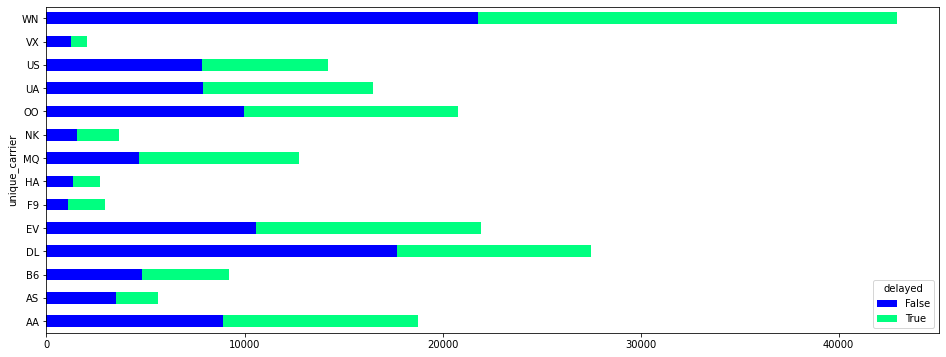

In [18]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [19]:
data['delayed_20'] = data['arr_delay'].apply(lambda x: x > 20)
delay_counts = data['delayed_20'].value_counts()
delay_counts

False    152985
True      48679
Name: delayed_20, dtype: int64

In [20]:
print ('Flights delayed longer than 20 min:', delay_counts[1]/(delay_counts[1] + delay_counts[0]) * 100, '%')

Flights delayed longer than 20 min: 24.138666296413838 %


In [23]:
flights_by_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396


In [24]:
data.pivot_table(columns='flight_date')

flight_date,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,2015-01-11 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00
actual_elapsed_time,141.688442,145.950033,145.111664,140.607814,137.699987,136.297427,138.249851,137.045859,137.876833,138.712463,139.096045,134.649796,133.110117
arr_delay,9.838904,25.461860,31.975011,18.811310,21.299274,11.955429,13.316482,12.255611,1.922475,10.187042,18.563998,3.162599,-0.817102
cancelled,0.015352,0.021446,0.026480,0.026287,0.025792,0.019459,0.050784,0.029298,0.015392,0.023993,0.027442,0.012978,0.011469
carrier_delay,16.668783,18.023806,18.213584,17.986333,16.751224,15.317566,19.767890,18.768564,25.002997,17.142741,15.063235,18.112939,22.049189
delayed,0.500209,0.648050,0.679244,0.548707,0.544695,0.483912,0.419639,0.468328,0.345917,0.436424,0.551360,0.382279,0.302835
delayed_20,0.216116,0.375988,0.417564,0.284143,0.311851,0.230749,0.197889,0.220515,0.127592,0.204487,0.285436,0.138274,0.092461
distance,839.785915,848.749320,838.077666,820.224801,784.111329,785.939182,792.963770,793.554910,830.779650,809.407279,791.471614,779.262121,782.294072
flight_num,2284.698047,2287.225541,2268.050514,2233.375030,2238.016324,2237.701561,2238.148479,2237.685657,2484.358312,2271.538701,2246.031407,2249.280171,2241.273711
late_aircraft_delay,21.317207,26.525643,31.864547,26.294995,28.462557,22.112744,26.855823,26.280862,17.287712,26.642197,25.970956,19.288743,18.260073
nas_delay,9.005254,13.782660,15.452955,14.294107,17.223935,14.835132,18.485873,11.877020,6.972028,12.194943,16.471140,11.319079,9.395081


In [26]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03 00:00:00,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04 00:00:00,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05 00:00:00,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06 00:00:00,92383.0,156971.0,94990.0,372.0,26299.0
2015-01-07 00:00:00,66708.0,96301.0,64607.0,165.0,17763.0
2015-01-08 00:00:00,74861.0,101703.0,70006.0,510.0,33015.0
2015-01-09 00:00:00,80123.0,112193.0,50703.0,182.0,15076.0
2015-01-10 00:00:00,50056.0,34610.0,13958.0,116.0,5683.0


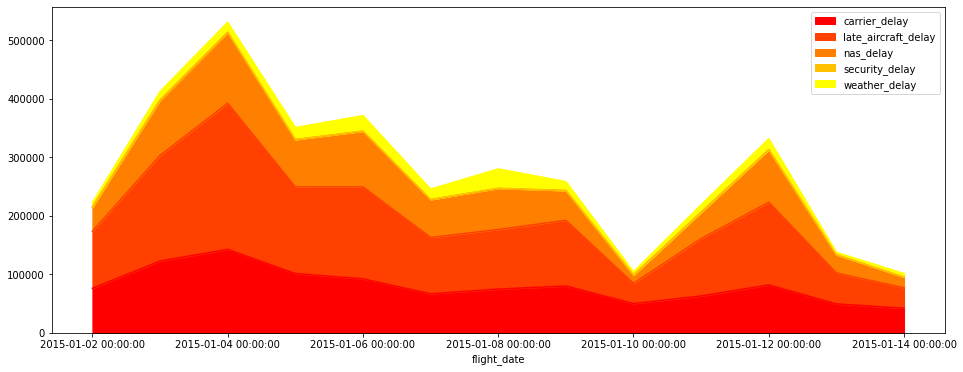

In [27]:
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='autumn')

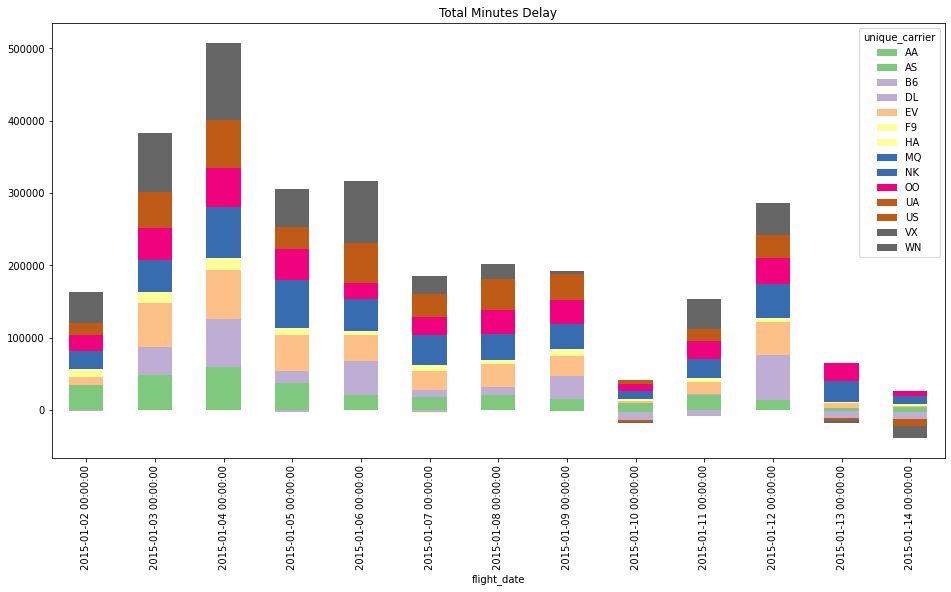

In [30]:
delay_by_day_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay', aggfunc='sum')
delay_by_day_carrier.plot(kind='bar', figsize=[16,8], stacked=True, colormap='Accent', title='Total Minutes Delay')

In [31]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)

In [32]:
delayed_flights = data[data['delayed'] == True] 
delayed_flights['unique_carrier'].value_counts()

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

In [33]:
data.groupby(['unique_carrier','delayed']).size().unstack()

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [34]:
delayed_by_carrier = data.groupby(['unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,unique_carrier,False,True
0,AA,8912,9841
1,AS,3527,2104
2,B6,4832,4401
3,DL,17719,9803
4,EV,10596,11371


In [35]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,unique_carrier,False,True,flights_count
0,AA,8912,9841,18753
1,AS,3527,2104,5631
2,B6,4832,4401,9233
3,DL,17719,9803,27522
4,EV,10596,11371,21967


In [36]:
delayed_by_carrier['proportion_delayed'] = delayed_by_carrier[True] / delayed_by_carrier['flights_count']
delayed_by_carrier[:4]

delayed,unique_carrier,False,True,flights_count,proportion_delayed
0,AA,8912,9841,18753,0.524769
1,AS,3527,2104,5631,0.373646
2,B6,4832,4401,9233,0.476660
3,DL,17719,9803,27522,0.356188


In [37]:
delayed_by_carrier.sort_values('proportion_delayed', ascending=False)

delayed,unique_carrier,False,True,flights_count,proportion_delayed
7,MQ,4692,8060,12752,0.632058
5,F9,1103,1848,2951,0.626228
8,NK,1550,2133,3683,0.579147
0,AA,8912,9841,18753,0.524769
10,UA,7885,8624,16509,0.522382
9,OO,9977,10804,20781,0.519898
4,EV,10596,11371,21967,0.517640
6,HA,1351,1354,2705,0.500555
13,WN,21789,21150,42939,0.492559
2,B6,4832,4401,9233,0.476660


In [47]:
data.pivot_table(columns='unique_carrier', values='arr_delay')

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
arr_delay,15.616299,1.731951,13.576129,4.118949,18.35852,28.836953,6.458937,35.627406,22.77967,19.031663,16.094772,7.671557,3.833908,11.273536


In [49]:
southwest = data[data['unique_carrier'] == 'WN']['arr_delay']
southwest.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

In [50]:
data[data['origin'] == 'ORD']['arr_delay'].describe()

count    9207.000000
mean       38.073205
std        63.261760
min       -49.000000
25%        -3.000000
50%        17.000000
75%        57.000000
max       751.000000
Name: arr_delay, dtype: float64

In [52]:
bin_values = np.arange(start=-50, stop=200, step=10)
print (bin_values)

[-50 -40 -30 -20 -10   0  10  20  30  40  50  60  70  80  90 100 110 120
 130 140 150 160 170 180 190]


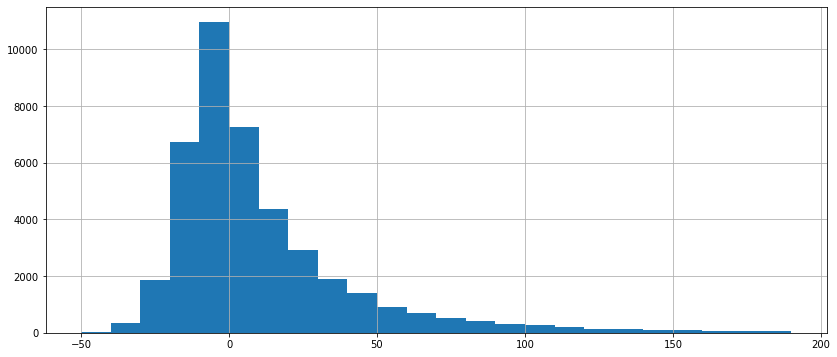

In [53]:
wn_carrier = data[data['unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

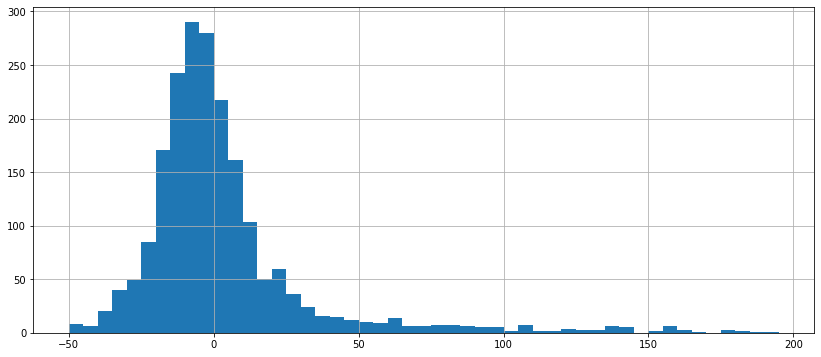

In [54]:
virgin_bin_values = np.arange(start=-50, stop=200, step=5)
virgin_carrier = data[data['unique_carrier'] == 'VX']
virgin_carrier['arr_delay'].hist(bins=virgin_bin_values, figsize=[14,6])

In [55]:
virgin_carrier.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed,delayed_20
59564,2015-01-02 00:00:00,VX,969.0,SAN,SFO,-20.0,0.0,447.0,NaN,NaN,NaN,NaN,NaN,86.0,False,False
59565,2015-01-02 00:00:00,VX,97.0,IAD,LAX,6.0,0.0,2288.0,NaN,NaN,NaN,NaN,NaN,350.0,True,False
59997,2015-01-14 00:00:00,VX,720.0,SFO,DAL,3.0,0.0,1476.0,NaN,NaN,NaN,NaN,NaN,209.0,True,False
59998,2015-01-14 00:00:00,VX,730.0,DAL,DCA,1.0,0.0,1184.0,NaN,NaN,NaN,NaN,NaN,160.0,True,False
59999,2015-01-14 00:00:00,VX,731.0,DCA,DAL,14.0,0.0,1184.0,NaN,NaN,NaN,NaN,NaN,230.0,True,False


In [56]:
filter_criterion = (virgin_carrier['arr_delay'] > 20) & (virgin_carrier['arr_delay'] < 25)
virgin_late_20 = virgin_carrier[filter_criterion]
print (virgin_late_20['origin'].shape)
print (virgin_late_20['origin'].value_counts())

(48,)
SFO    13
LAX    12
JFK     4
DAL     4
EWR     4
IAD     3
FLL     2
ORD     2
LAS     1
DCA     1
LGA     1
BOS     1
Name: origin, dtype: int64


In [57]:
filter_criterion = (virgin_carrier['arr_delay'] > 15) & (virgin_carrier['arr_delay'] < 20)
virgin_late_30 = virgin_carrier[filter_criterion]
print (virgin_late_30['origin'].shape)
print (virgin_late_30['origin'].value_counts())

(43,)
LAX    15
SFO    12
JFK     4
DAL     3
BOS     3
LGA     2
DCA     1
ORD     1
SAN     1
EWR     1
Name: origin, dtype: int64


unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

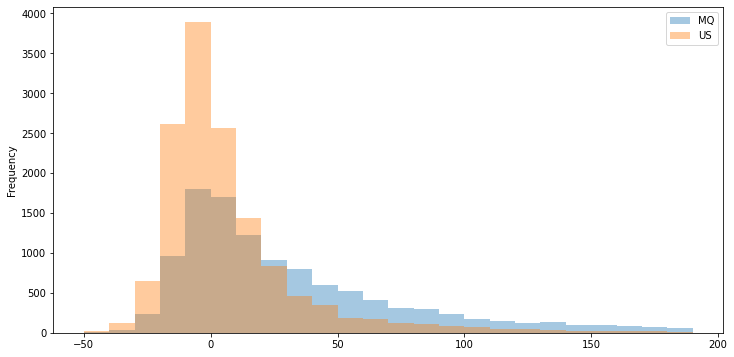

In [58]:
bin_values = np.arange(start=-50, stop=200, step=10)
us_mq_airlines_index = data['unique_carrier'].isin(['US','MQ']) 
us_mq_airlines = data[us_mq_airlines_index] 
group_carriers = us_mq_airlines.groupby('unique_carrier')['arr_delay'] 
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True)

In [59]:
group_carriers.describe()

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0


In [66]:
hi_volume = data['origin'].value_counts()[:20]
hi_volume

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
IAH     5762
PHX     5610
SFO     5551
LAS     4902
MCO     4318
LGA     4075
DTW     4048
CLT     3959
MSP     3789
EWR     3754
SLC     3740
BOS     3738
SEA     3639
JFK     3609
FLL     3052
Name: origin, dtype: int64

In [68]:
hi_volume_airports_names = hi_volume.index.tolist()
print (hi_volume_airports_names)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'SFO', 'LAS', 'MCO', 'LGA', 'DTW', 'CLT', 'MSP', 'EWR', 'SLC', 'BOS', 'SEA', 'JFK', 'FLL']


In [69]:
hi_volume_airports = data[data['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed,delayed_20
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False,False
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False,False
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False,False
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False,False
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True,True


In [70]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
flight_date,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00,3.327536,3.590580,0.509317,20.526899,36.049598,-6.842809,8.316993,-0.543307,12.156187,3.688742,13.709512,16.500000,-2.947712,5.834734,1.193333,4.590062,16.547325,12.254717,8.371429,4.534161
2015-01-03 00:00:00,15.428112,30.471616,13.768340,51.186292,37.604138,22.738007,37.370229,15.666667,39.844037,31.882979,18.550685,26.117338,15.606426,17.511364,20.027586,37.995702,19.783843,13.771812,11.773364,13.465190
2015-01-04 00:00:00,21.423343,26.867857,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,20.464286,55.445578,19.564767,28.159016,32.450704,39.847025,19.461279,83.225619,20.180085,10.291262,19.251092,15.503125
2015-01-05 00:00:00,3.095000,11.208609,6.051672,29.899200,28.705263,24.696594,22.674051,13.711864,8.450505,19.554422,17.229381,15.788618,34.984177,14.929204,23.874564,63.916667,13.665217,5.418060,13.225806,2.003356
2015-01-06 00:00:00,6.361725,43.310580,13.294964,15.344029,11.534626,35.078616,43.104530,23.425926,3.622642,43.359073,13.330579,7.234004,61.165049,29.996785,9.435088,42.356183,12.156658,4.372180,8.582716,0.581481
2015-01-07 00:00:00,0.944276,10.651316,4.869565,33.301095,10.428762,13.403727,22.030508,11.254464,10.490476,15.536680,7.498652,5.442446,46.063973,8.977918,-1.666667,38.479361,7.348028,9.467925,5.289216,2.977941
2015-01-08 00:00:00,3.033099,6.807692,10.484568,14.569873,11.217450,20.593060,15.419463,2.558442,1.571121,2.749091,8.597911,6.171329,3.575221,9.152648,47.264605,96.695578,8.000000,8.738351,5.141487,12.619718
2015-01-09 00:00:00,1.833499,21.045603,5.742331,21.551237,8.591810,34.665653,22.632107,1.808696,7.611354,43.294964,4.487245,8.144112,42.325581,8.758410,6.834459,46.355837,2.160550,7.464029,9.425178,3.878893
2015-01-10 00:00:00,-5.473046,3.763547,-1.658915,2.822014,5.501582,2.584906,0.422680,-5.172269,0.937888,1.259259,2.564706,2.709746,-11.311475,0.273273,8.542857,16.635209,2.213483,-2.761506,0.621622,2.718894


In [71]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


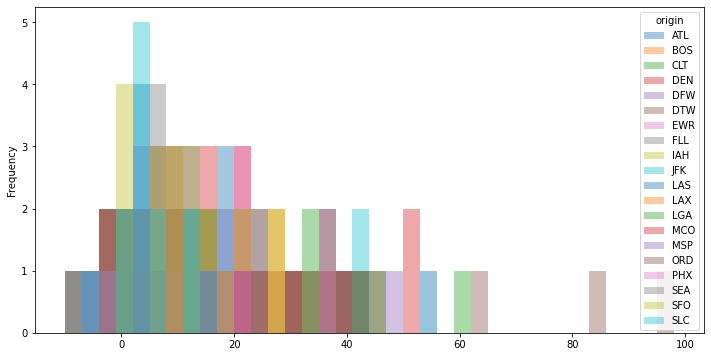

In [73]:
airport_bins = np.arange(-10,100,3)
hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,6], alpha=.4, legend=True)

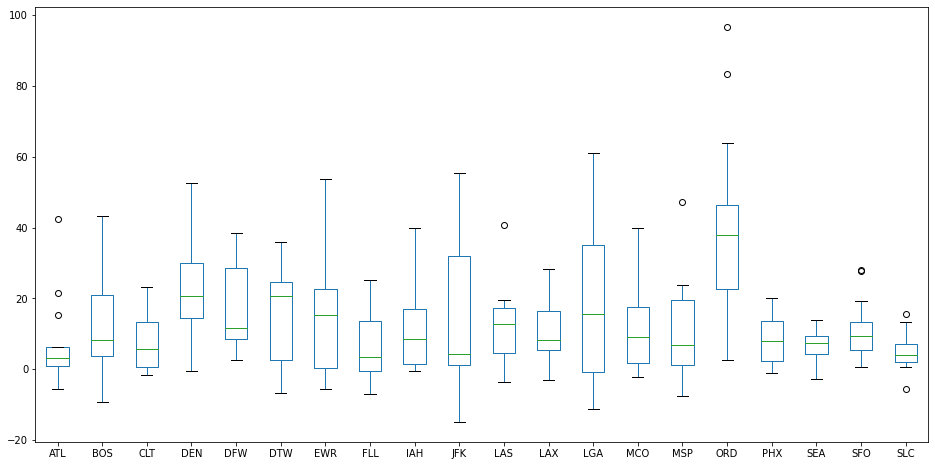

In [74]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])

KeyError: ignored